<a href="https://colab.research.google.com/github/asyhasnaa/Ghibloo-App/blob/master/Source_Code_Tubes_Strategi_Algoritma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas Besar Strategi Algoritma

**Studi Kasus** :Algoritma Pengurutan

**Judul** :Perbandingan Efisiensi Waktu Eksekusi Antara Algoritma Merge Sort dan Quick Sort untuk Pengurutan Data

**Anggota**
1. Refi Junitasari - 21102001
2. Aisyah Hasna Aulia - 21102020
3. Sukhaenah Tri Utami - 21102027
4. Luthfiah Gustiana - 21102197

     Size  Merge Sort Time (s)  Quick Sort Time (s)
0      10             0.000039             0.000032
1     100             0.000584             0.000376
2    1000             0.006712             0.004747
3   10000             0.084919             0.061306
4  100000             1.105518             0.749392


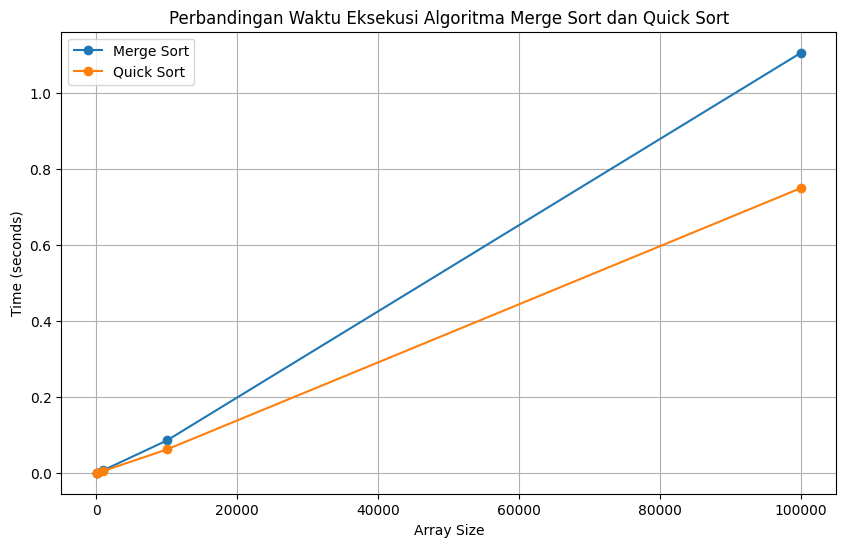

In [ ]:
import time
import random
import pandas as pd
import matplotlib.pyplot as plt

# Implementasi Merge Sort
def merge_sort(arr):
    if len(arr) > 1:
        mid = len(arr) // 2
        left = arr[:mid]
        right = arr[mid:]

        merge_sort(left)
        merge_sort(right)

        i = j = k = 0
        while i < len(left) and j < len(right):
            if left[i] < right[j]:
                arr[k] = left[i]
                i += 1
            else:
                arr[k] = right[j]
                j += 1
            k += 1

        while i < len(left):
            arr[k] = left[i]
            i += 1
            k += 1

        while j < len(right):
            arr[k] = right[j]
            j += 1
            k += 1

# Implementasi Quick Sort
def quick_sort(arr):
    if len(arr) <= 1:
        return arr
    else:
        pivot = arr[len(arr) // 2]
        left = [x for x in arr if x < pivot]
        middle = [x for x in arr if x == pivot]
        right = [x for x in arr if x > pivot]
        return quick_sort(left) + middle + quick_sort(right)

# Fungsi untuk mengukur waktu eksekusi
def measure_sort_time(sort_function, data):
    start_time = time.time()
    sort_function(data)
    return time.time() - start_time

# Simulasi Pengujian
sizes = [10, 100, 1000, 10000, 100000]  # Variasi ukuran array
results = []

for size in sizes:
    original_data = [random.randint(1, 1000000) for _ in range(size)]  # Simpan data asli

    # Test Merge Sort
    merge_sort_time = measure_sort_time(merge_sort, original_data.copy())

    # Test Quick Sort
    quick_sort_time = measure_sort_time(quick_sort, original_data.copy())

    # Simpan hasil
    results.append({
        "Size": size,
        "Merge Sort Time (s)": merge_sort_time,
        "Quick Sort Time (s)": quick_sort_time
    })

# Tampilkan hasil dalam bentuk tabel
df_results = pd.DataFrame(results)
print(df_results)

# Visualisasi hasil
plt.figure(figsize=(10, 6))
plt.plot(df_results["Size"], df_results["Merge Sort Time (s)"], label="Merge Sort", marker='o')
plt.plot(df_results["Size"], df_results["Quick Sort Time (s)"], label="Quick Sort", marker='o')
plt.xlabel("Array Size")
plt.ylabel("Time (seconds)")
plt.title("Perbandingan Waktu Eksekusi Algoritma Merge Sort dan Quick Sort")
plt.legend()
plt.grid()
plt.show()
